# 1º Problema de Negócio

Prever se um cliente irá pagar uma divida com base em dados pessoais e dados relacionados ao relacionamento do cliente com uma insituição financeira, precisamos classificar os clientes em duas categorias


*   1 = Inadimplentes
*   2 = Adimplentes

Cada cliente é representado no conjunto de dados por 15 atributos ou caracteristicas do cliente.

**Atributos** (variáveis de entrada)


Aqui está a lista das colunas enumeradas com uma breve descrição de cada uma:

1. **id**: Identificador único do cliente.
2. **idade**: Idade do cliente.
3. **sexo**: Sexo do cliente (M para masculino, F para feminino).
4. **dependentes**: Número de dependentes do cliente.
5. **escolaridade**: Nível de escolaridade do cliente.
6. **estado_civil**: Estado civil do cliente.
7. **salario_anual**: Faixa de salário anual do cliente.
8. **tipo_cartao**: Tipo de cartão de crédito do cliente.
9. **meses_de_relacionamento**: Número de meses que o cliente tem relacionamento com a instituição financeira.
10. **qtd_produtos**: Quantidade de produtos financeiros adquiridos pelo cliente.
11. **iteracoes_12m**: Número de interações do cliente com a instituição nos últimos 12 meses.
12. **meses_inativo_12m**: Número de meses em que o cliente esteve inativo nos últimos 12 meses.
13. **limite_credito**: Limite de crédito do cliente.
14. **valor_transacoes_12m**: Valor total das transações do cliente nos últimos 12 meses.
15. **qtd_transacoes_12m**: Quantidade total de transações do cliente nos últimos 12 meses.

**Atributo** (variável alvo)

1. **default**: Indicador se o cliente está inadimplente (0 para não inadimplente, 1 para inadimplente).

# 2º Análise Exploratória dos Dados

Nesse tópico, é necessário descobrir os dados e descobrir novas informações que será importante para criarmos nosso modelo prediditivo.




In [112]:
#Importando bibliotecas necessárias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#Download dos dados

URL = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'
df = pd.read_csv(URL, na_values = 'na' )

In [114]:
# Descobrindo o schema dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [115]:
# Top 10 linhas para uma análise geral
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [116]:
# Verificado se tem valores ausentes/nulos

df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [117]:
# Verificando dados duplicados
df.duplicated().sum()

0

In [118]:
# Atualizando valores da variável alvo para uma melhor análise.

df['default'] = df['default'].replace({0: 'Adimplente', 1: 'Inadimplente'})


default
Adimplente      0.84
Inadimplente    0.16
Name: proportion, dtype: float64

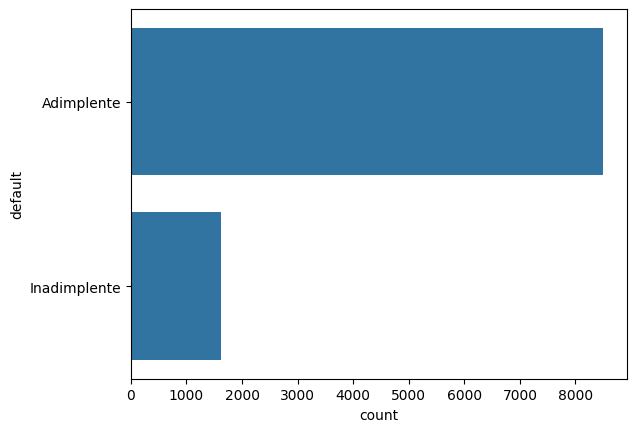

In [119]:
# Analisando a distribuição da variavel alvo
df['default'].value_counts()
sns.countplot(df['default'])

round(df.loc[:, 'default'].value_counts(normalize=True),2)


In [120]:
# Análise estatistica de cada tabela
df.describe()

,id,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


# 3º Pré-Processamento dos Dados

In [121]:
# remvoer os valores nulos do df

df = df.dropna()
df.isna().sum()


id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [122]:
#Para criamos o modelo precisamos que todas as variáveis sejam categórias,
# para isso foi utilizando o LabelEncoder para definir rotulos para cada variável

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.copy()

for column in df.columns:
  if column != 'default':
    df[column] = le.fit_transform(df[column])

df.head()


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,5003,Adimplente,19,1,3,1,0,2,0,26,4,3,1,1123,86,32
1,6865,Adimplente,23,0,5,3,2,4,0,31,5,2,1,6135,272,23
2,2131,Adimplente,25,1,3,3,0,3,0,23,3,0,1,4053,1328,10
4,355,Adimplente,14,1,3,4,0,2,0,8,4,0,1,5042,6929,18
5,1790,Adimplente,18,1,2,3,0,1,0,23,2,2,1,4658,39,14


In [123]:
#Converter variáveis categóricas em variáveis numéricas (one-hot encoding) para cria uma matriz de correlação.
df_normalizado = df.copy()
df_normalizado['default'] = df_normalizado['default'].replace(['Adimplente', 'Inadimplente'], [0, 1])

In [124]:
# análise de correlação
correlation2 = df_normalizado.corr()

<Axes: >

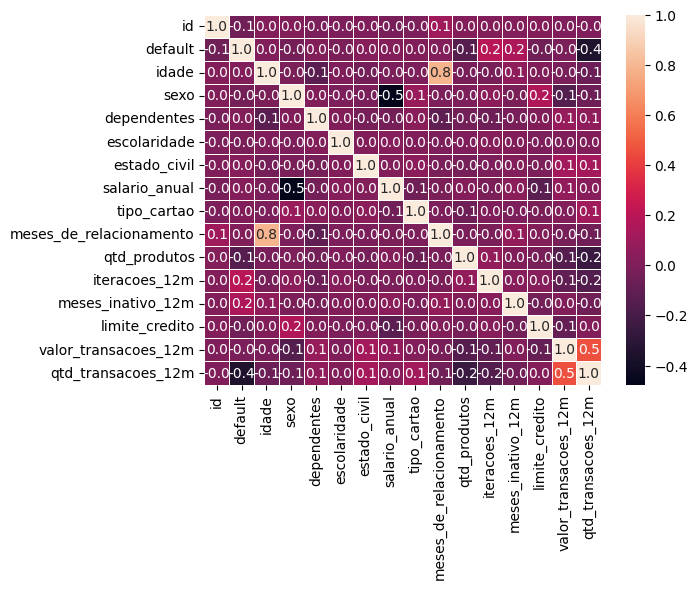

In [125]:
# plot da matriz de correlação
plot2 = sns.heatmap(correlation2, annot = True,  fmt=".1f", linewidths=.6)
plot2

In [126]:
#  ordenar  a variavel correlation para ver as variáveis que serão utilizadas no modelo

sorted_correlation = correlation2.sort_values(by=['default'], ascending=False)
print(sorted_correlation['default'])


default                    1.000000
iteracoes_12m              0.193923
meses_inativo_12m          0.152732
estado_civil               0.024305
salario_anual              0.017429
dependentes                0.011423
meses_de_relacionamento    0.009249
idade                      0.008767
tipo_cartao                0.004156
escolaridade              -0.012305
valor_transacoes_12m      -0.016159
sexo                      -0.035358
limite_credito            -0.047642
id                        -0.051255
qtd_produtos              -0.145713
qtd_transacoes_12m        -0.357265
Name: default, dtype: float64


In [127]:
#Removendo colunas com correlação negativa
df= df.drop(columns=['escolaridade', 'valor_transacoes_12m', 'sexo', 'id', 'limite_credito', 'qtd_produtos', 'qtd_transacoes_12m'])


In [128]:
#Separação das variáveis de entrada(variáveis explicativas) e de Saída (Target)

X = df[['iteracoes_12m' ,'meses_inativo_12m','estado_civil','salario_anual','dependentes','meses_de_relacionamento','idade', 'tipo_cartao']]
y = df['default']

In [129]:
#Separa o data set em 30% teste e 70%treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [131]:
# Normalizar os dados de treino e teste antes de criar o modelo (deixar tudo na mesma escala para uma variavel nao ter mais influencia que outra)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4º Modelo Preditivo - KNN

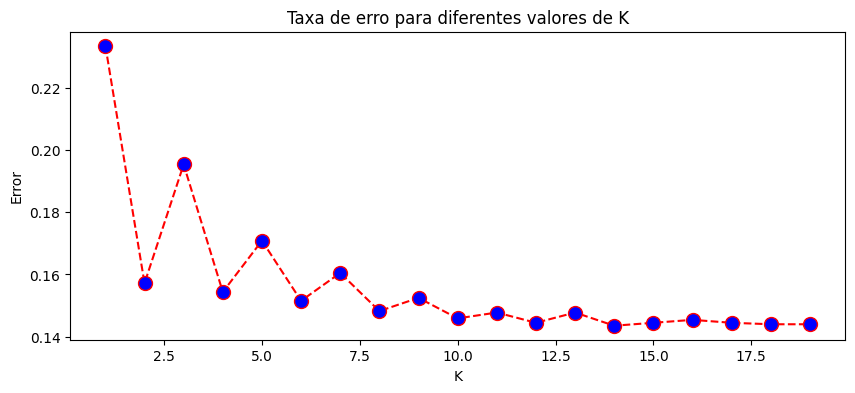

In [132]:
#Grafico Elbow para achar o K

error = []
# Calculating error for K values between 1 and 10
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10, 4))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro para diferentes valores de K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()


In [133]:
# Criando o modelo e treinando os dados
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [134]:
# Aplicando o modelo aos dados de teste
y_pred = classifier.predict(X_test)

In [135]:
# Comparar  dados de teste e valores preditos
Real_vs_predito = pd.DataFrame({'Real: ': y_test,
                    'Predito: ': y_pred})
Real_vs_predito.head(10)

,Real:,Predito:
6432,Adimplente,Adimplente
7601,Adimplente,Adimplente
326,Adimplente,Adimplente
7495,Adimplente,Adimplente
693,Adimplente,Adimplente
9030,Adimplente,Adimplente
5542,Inadimplente,Adimplente
5494,Adimplente,Adimplente
9268,Inadimplente,Adimplente
3003,Adimplente,Adimplente


# 5º Avaliação Máquina Preditiva ( KNN Métricas)

In [136]:
#Acurácia

print('Accuracy: \n', accuracy_score(y_test, y_pred))

Accuracy: 
 0.8428235294117647


In [137]:
#Classification report
print('Classification metrics: \n', classification_report(y_test, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

  Adimplente       0.86      0.97      0.91      1817
Inadimplente       0.33      0.08      0.13       308

    accuracy                           0.84      2125
   macro avg       0.60      0.53      0.52      2125
weighted avg       0.78      0.84      0.80      2125





**Métricas de Desempenho por Classe para o KNN**


*Adimplentes:*

**Precision (Precisão): 0.86**

*   86% das previsões de Adimplente estão corretas.


**Recall (Revocação): 0.97**


*   97% dos Adimplentes reais foram identificados corretamente.


**F1-Score: 0.91**


*   Combinação balanceada de precisão e revocação.


*Inadimplentes:*

**Precision (Precisão): 0.33**

33% das previsões de Inadimplentes estão corretas.

**Recall (Revocação): 0.08**

*   Apenas 8% dos Inadimplentes reais foram identificados corretamente.


**F1-Score: 0.13**



*   Combinação muito baixa de precisão e revocação, indicando problemas em identificar corretamente os Inadimplentes.

**Accuracy (Acurácia): 0.84**

*   84% das previsões totais estão corretas.



In [138]:
#Matriz de confusão

print('Confusion_matrix: \n', confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[1766   51]
 [ 283   25]]


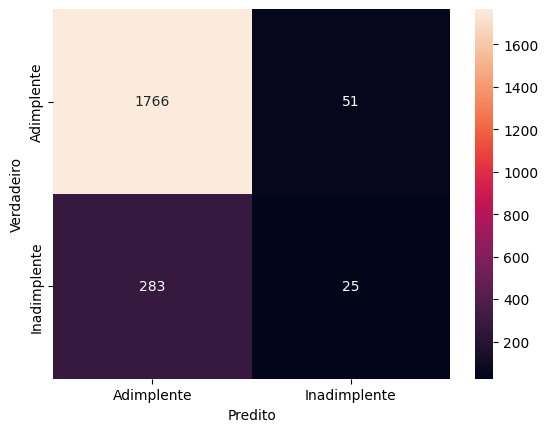

In [139]:
#Matriz de confusão

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['default'].unique(), yticklabels=df['default'].unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()



**A matriz de confusão mostra o seguinte:**

* **Verdadeiros Positivos (TP):** 1766 - São os casos em que o modelo previu corretamente "Adimplente" e o valor real também era "Adimplente".
* **Falsos Negativos (FN):** 283 - São os casos em que o modelo previu incorretamente "Adimplente" quando o valor real era "Inadimplente".
* **Falsos Positivos (FP):** 51 - São os casos em que o modelo previu incorretamente "Adimplente" quando o valor real era "Inadimplente".
* **Verdadeiros Negativos (TN):** 25 - São os casos em que o modelo previu corretamente "Inadimplente" e o valor real também foi "Inadimplente".

**Análise:**

* O modelo possui um elevado número de Verdadeiros Positivos (TP), indicando que é bom na identificação correta de casos de “Adimplente”.
* O modelo apresenta um número relativamente baixo de Falsos Negativos (FN), indicando que não costuma classificar erroneamente os casos de “Adimplente” como “Inadimplente”.
* O modelo apresenta um número um pouco maior de Falsos Positivos (FP) em comparação com Falsos Negativos, indicando que às vezes classifica erroneamente os casos de “Inadimplente” como “Adimplente”.
* No geral, o modelo apresenta um bom desempenho, com alta precisão e classificação equilibrada para ambas as classes.


In [140]:
# Resumo e validação do modelo


# Calcular o número de previsões corretas
previsoes_corretas = (y_pred == y_test).sum()
previsoes_incorretas = len(y_test) - previsoes_corretas
percentual_corretas = (previsoes_corretas / len(y_test)) * 100
percentual_incorretas = (previsoes_incorretas / len(y_test)) * 100


print(f"Número de previsões corretas: {previsoes_corretas}")
print(f"Número de previsões incorretas: {previsoes_incorretas} \n")


print(f"% corretas: {percentual_corretas}")
print(f"% incorretas: {percentual_incorretas}")


Número de previsões corretas: 1791
Número de previsões incorretas: 334 

% corretas: 84.28235294117647
% incorretas: 15.71764705882353


# 6º Modelo Pretitivo - RNA

**Criando o modelo de Rede Neural e Treinando**




In [141]:


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Rede Neural
nn_model = MLPClassifier(hidden_layer_sizes=(24,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.01)

# Treinando o Modelo
nn_model.fit(X_train, y_train)

# Fazendo Previsões
y_pred_rna = nn_model.predict(X_test)

#Parâmetros da rede neural

#hidden_layer_sizes = números de neurônios camadas ocultas
#activation = função de ativação das camadas das redes neurais
#solver = algoritmo de otimização
#max_iter = define o número máximo de iterações (épocas) que o algoritmo de treinamento utilizará durante o processo de treinamento da rede neural.
#learning_rate = define a taxa de aprendizado inicial para o algoritmo de otimização durante o treinamento da rede neural.

In [142]:
# Comparando dados de teste e valores preditos
Real_vs_predito_rna = pd.DataFrame({'Real: ': y_test,
                    'Predito: ': y_pred_rna})
Real_vs_predito_rna.head(10)

,Real:,Predito:
6432,Adimplente,Adimplente
7601,Adimplente,Adimplente
326,Adimplente,Adimplente
7495,Adimplente,Adimplente
693,Adimplente,Adimplente
9030,Adimplente,Adimplente
5542,Inadimplente,Inadimplente
5494,Adimplente,Adimplente
9268,Inadimplente,Adimplente
3003,Adimplente,Inadimplente


# 7º Avaliação Máquina Preditiva (RNA Métricas)

In [143]:
#Avaliação do modelo pelas médias das estatisticas
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
ac_sc = accuracy_score(y_test, y_pred_rna)
rc_sc = recall_score(y_test, y_pred_rna, average="weighted")
pr_sc = precision_score(y_test,y_pred_rna, average="weighted")
f1_sc = f1_score(y_test, y_pred_rna, average="weighted")
consufion_m = confusion_matrix(y_test, y_pred_rna)

print("===== RNA====")
print("Accuracy   :", ac_sc)
print("Recall     :", rc_sc)
print("Precision  :", pr_sc)
print("F1 Score   :", f1_sc)
print("Confusion Matrix   : \n")
print(consufion_m)

===== RNA====
Accuracy   : 0.848
Recall     : 0.848
Precision  : 0.8048145814581459
F1 Score   : 0.8136312607059718
Confusion Matrix   : 

[[1759   58]
 [ 265   43]]


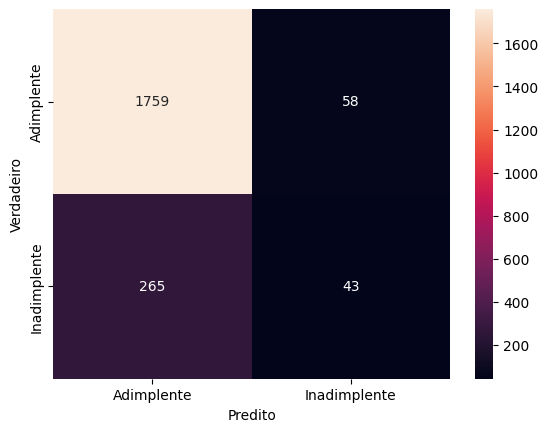

In [144]:
#Matriz de confusão

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rna)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['default'].unique(), yticklabels=df['default'].unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


**A matriz de confusão mostra o seguinte:**

* **Verdadeiros Positivos (TP):** 1759 - São os casos em que o modelo previu corretamente "Adimplente" e o valor real também era "Adimplente".
* **Falsos Negativos (FN):** 265 - São os casos em que o modelo previu incorretamente "Adimplente" quando o valor real era "Inadimplente".
* **Falsos Positivos (FP):** 58 - São os casos em que o modelo previu incorretamente "Inadimplente" quando o valor real era "Adimplente".
* **Verdadeiros Negativos (TN):** 43 - São os casos em que o modelo previu corretamente "Inadimplente" e o valor real também foi "Inadimplente".

In [145]:
#Classificação report da RNA

print(classification_report(y_test, y_pred_rna))


              precision    recall  f1-score   support

  Adimplente       0.87      0.97      0.92      1817
Inadimplente       0.43      0.14      0.21       308

    accuracy                           0.85      2125
   macro avg       0.65      0.55      0.56      2125
weighted avg       0.80      0.85      0.81      2125



**Métricas de Desempenho por Classe para a rede Neural**


*Adimplentes:*

**Precision (Precisão): 0.87**

*   87% das previsões de Adimplente estão corretas.


**Recall (Revocação): 0.97**


*   97% dos Adimplentes reais foram identificados corretamente.


**F1-Score: 0.92**


*   Combinação balanceada de precisão e revocação.


*Inadimplentes:*

**Precision (Precisão): 0.43**

43% das previsões de Inadimplente estão corretas.

**Recall (Revocação): 0.14**

*   Apenas 14% dos Inadimplentes reais foram identificados corretamente.


**F1-Score: 0.21**



*   Combinação muito baixa de precisão e revocação, indicando problemas em identificar corretamente os Inadimplentes.

**Accuracy (Acurácia): 0.85**

*   85% das previsões totais estão corretas.



In [146]:
# Resumo e validação do modelo


# Calcular o número de previsões corretas
previsoes_corretas = (y_pred_rna == y_test).sum()
previsoes_incorretas = len(y_test) - previsoes_corretas
percentual_corretas = (previsoes_corretas / len(y_test)) * 100
percentual_incorretas = (previsoes_incorretas / len(y_test)) * 100


print(f"Número de previsões corretas RNN: {previsoes_corretas}")
print(f"Número de previsões incorretas RNN: {previsoes_incorretas} \n")


print(f"% corretas: {percentual_corretas}")
print(f"% incorretas: {percentual_incorretas}")

Número de previsões corretas RNN: 1802
Número de previsões incorretas RNN: 323 

% corretas: 84.8
% incorretas: 15.2


# 8º Conclusão

Ambos os modelos têm a mesma revocação para a classe Adimplente (0.97), indicando que ambos são igualmente bons em identificar os Adimplentes reais. No entanto, o modelo de rede neural tem uma precisão ligeiramente superior (0.87 vs. 0.86) e um F1-score ligeiramente superior (0.92 vs. 0.91), tornando-o marginalmente melhor para identificar Adimplentes.

Portanto, o modelo de RNN é ligeiramente melhor para identificar Adimplentes.